In [ ]:
#Heart disease is related to any disorder of Heart. Studies shows that the number of deaths due to heart disease increased significatnly over the past decade.
#Hence preventing the heart disease has become crucial now. Excellent data driven systems can predict the heart disease before the time and can saves the lives.
#Machine Learning can play important role over here, it helps in predicting the heart disease quite accurately.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Import Dataset
from google.colab import files
uploaded = files.upload()

Saving heartDisease_Data.csv to heartDisease_Data.csv


In [3]:
#Store data into variable
df=pd.read_csv('heartDisease_Data.csv')

# print the data
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


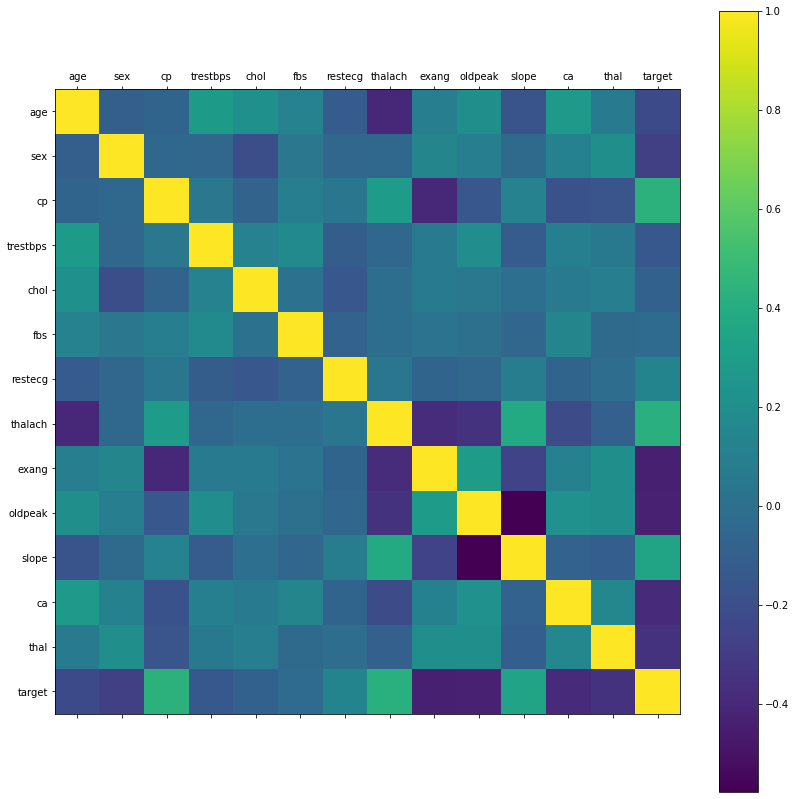

In [9]:
#Understanding the data
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d9e093128>,
      dtype=object)

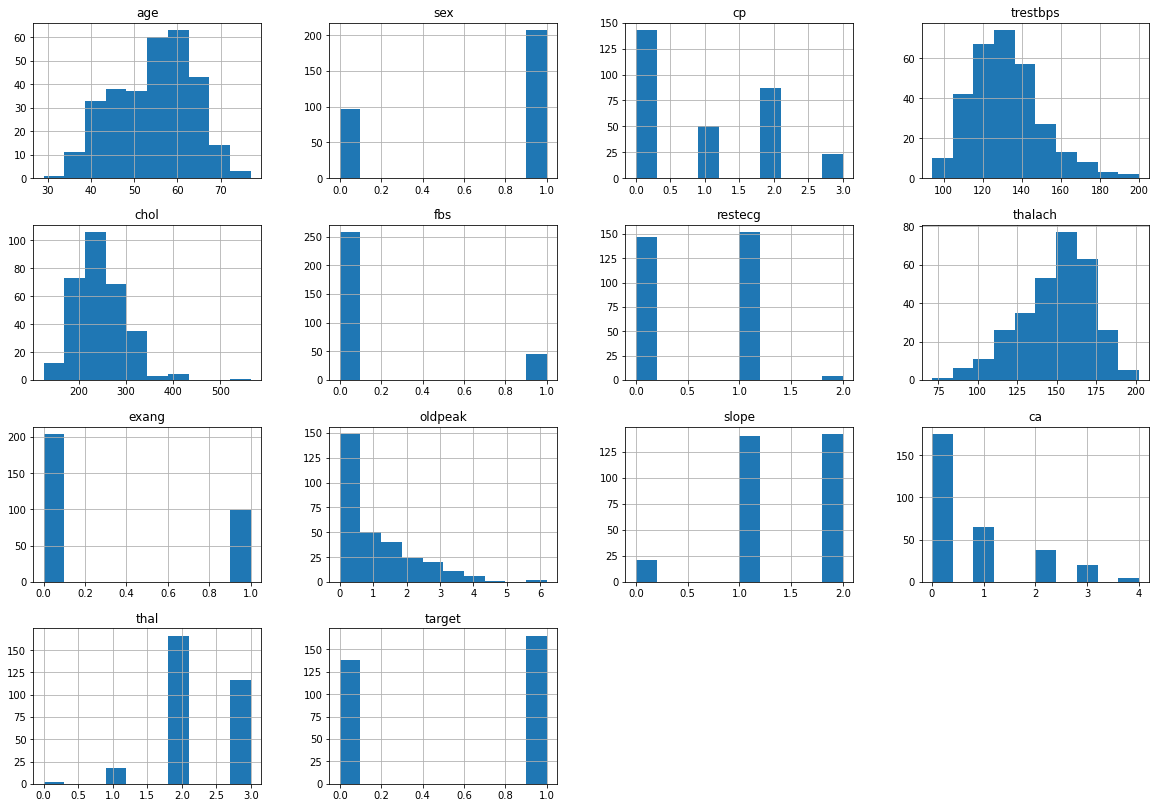

In [10]:
df.hist()

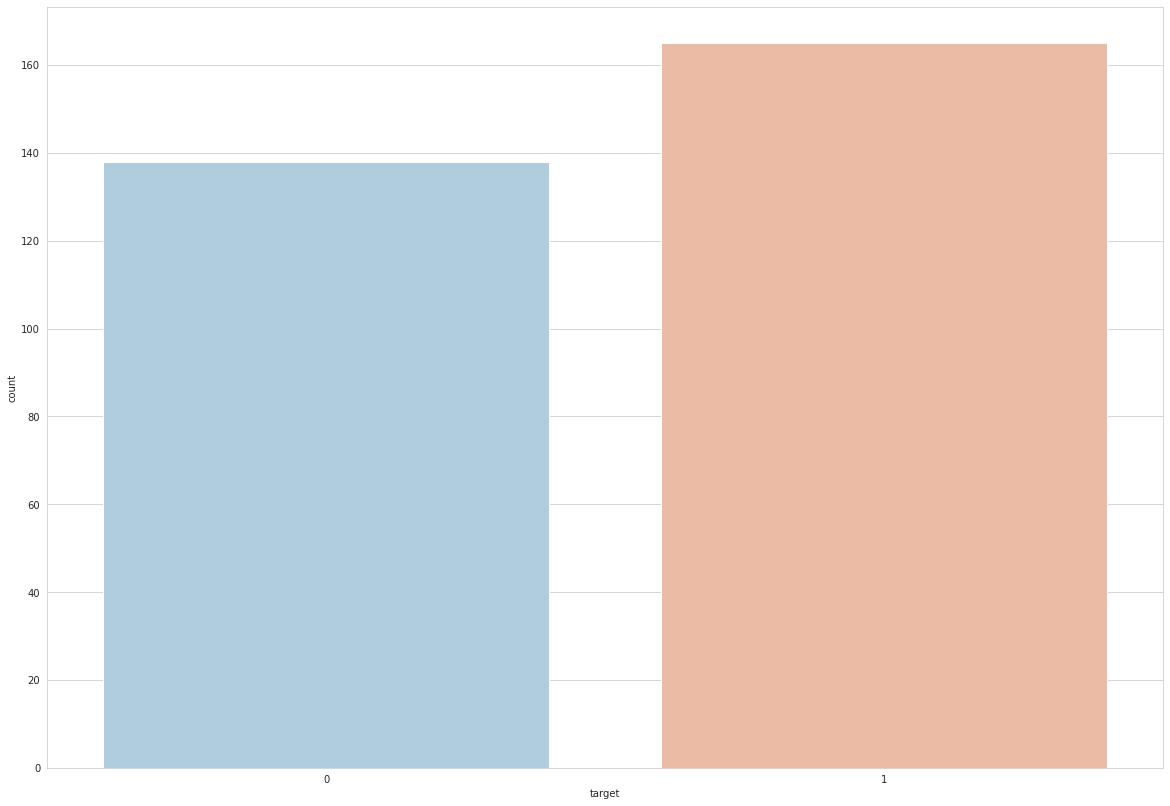

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

1    165
0    138
Name: target, dtype: int64


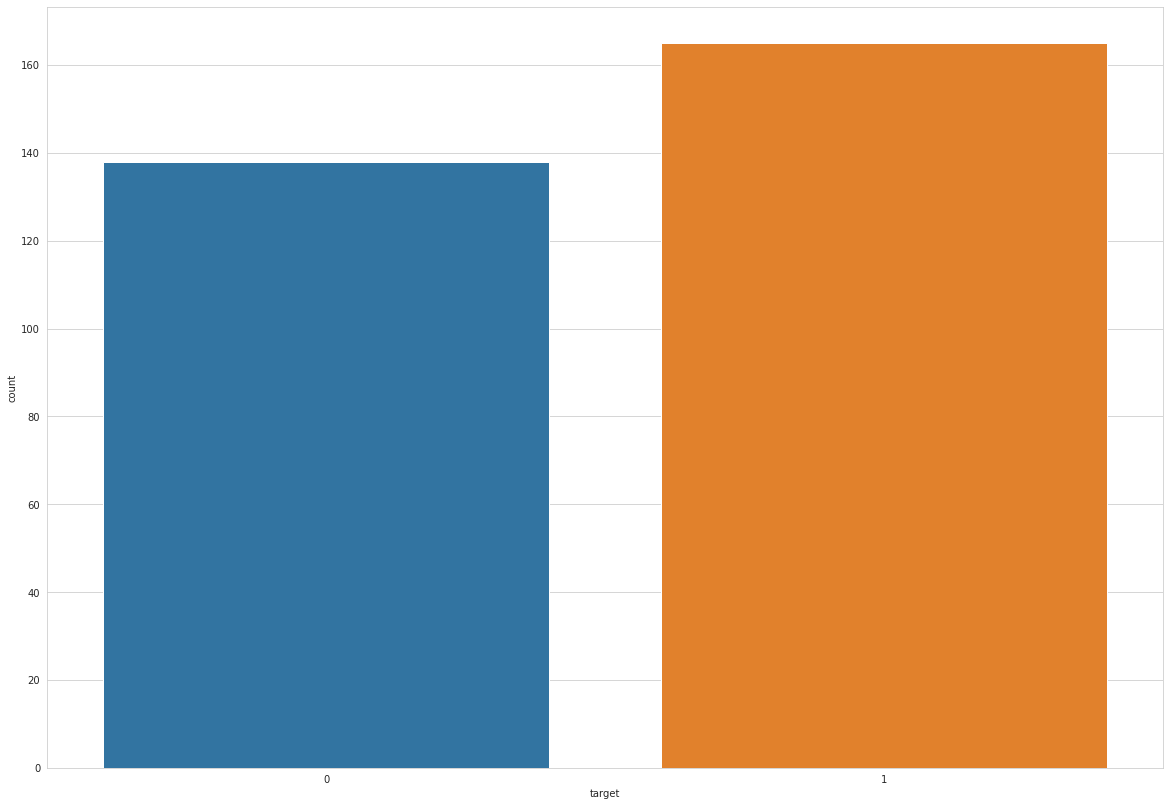

In [13]:
y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()
print(target_temp)

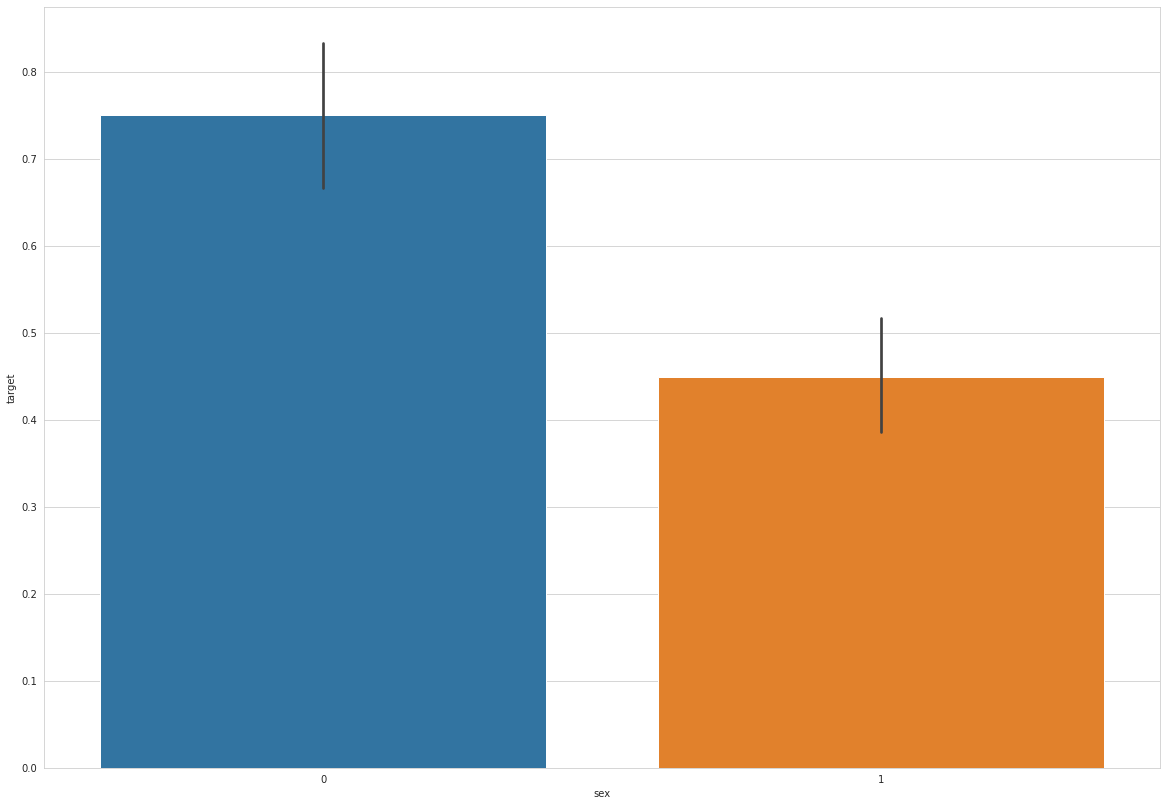

In [14]:
# Heart problem in male 1 /Female 0
sns.barplot(df["sex"],y)

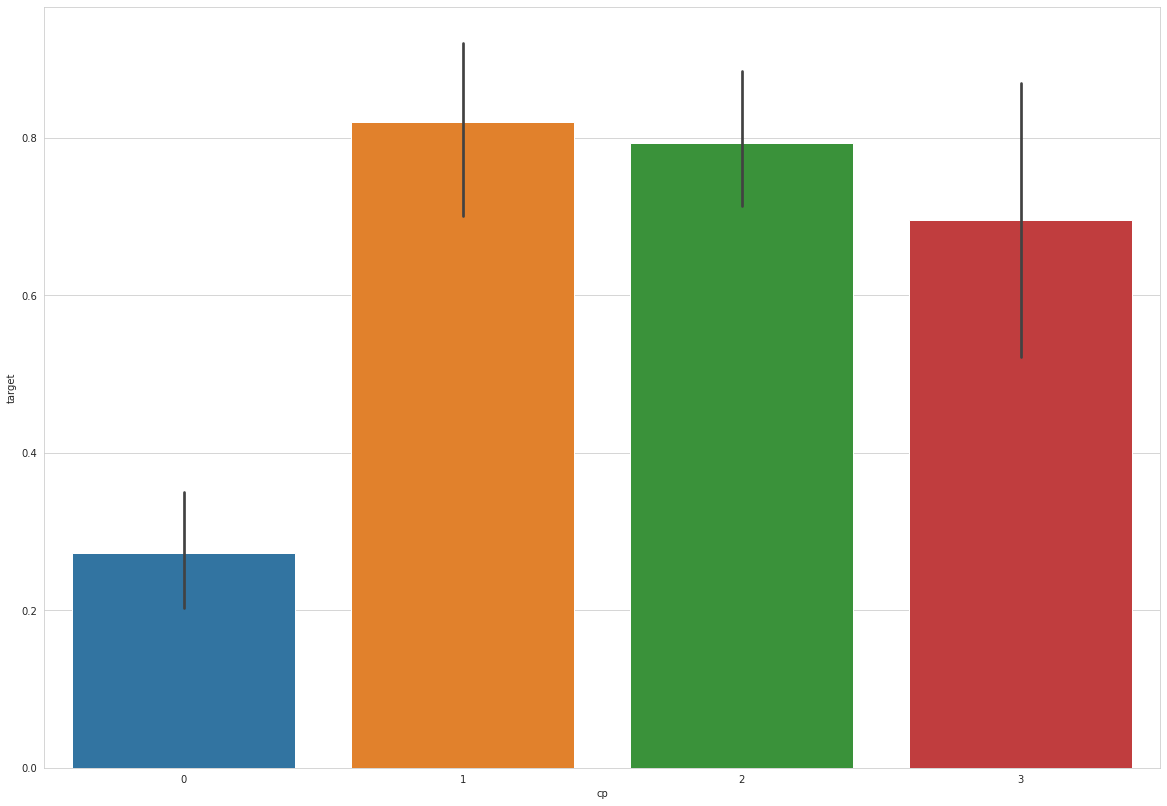

In [15]:
#Analysing the 'Chest Pain Type' feature
sns.barplot(df["cp"],y)

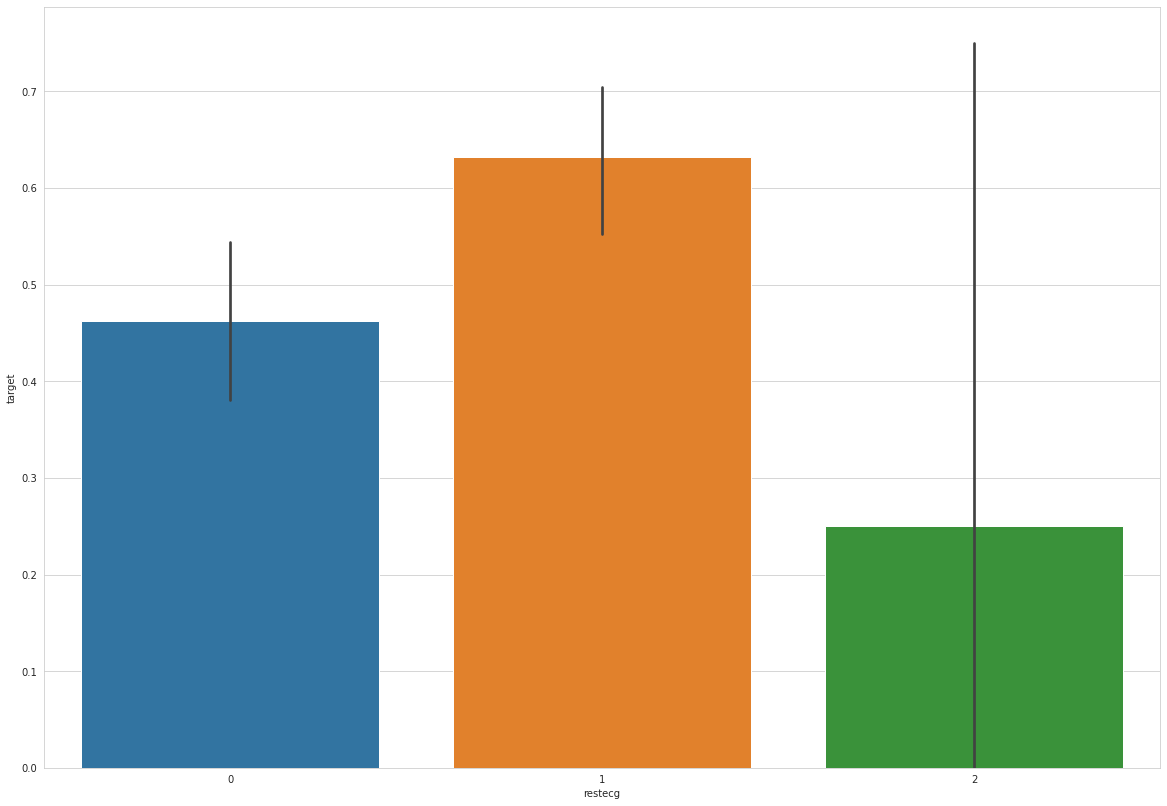

In [16]:
#Analysing the restecg feature
sns.barplot(df["restecg"],y)


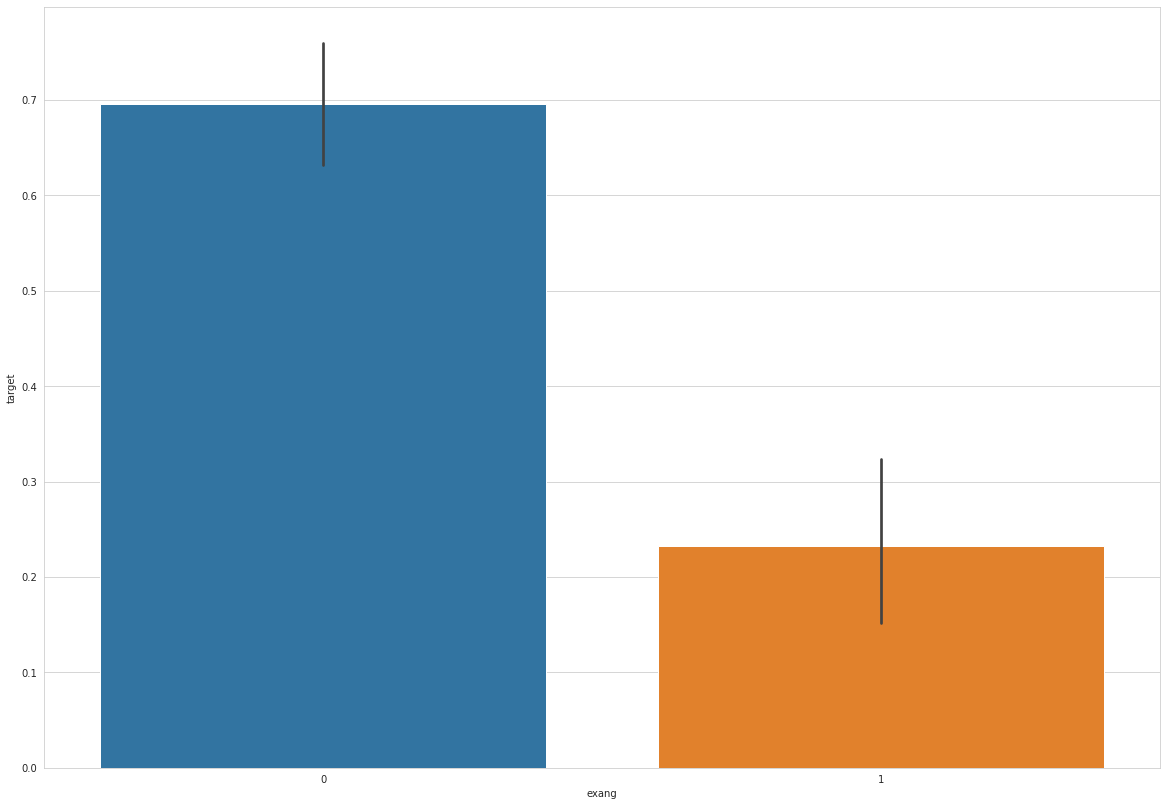

In [17]:
#Analysing the 'exang' feature
sns.barplot(df["exang"],y)

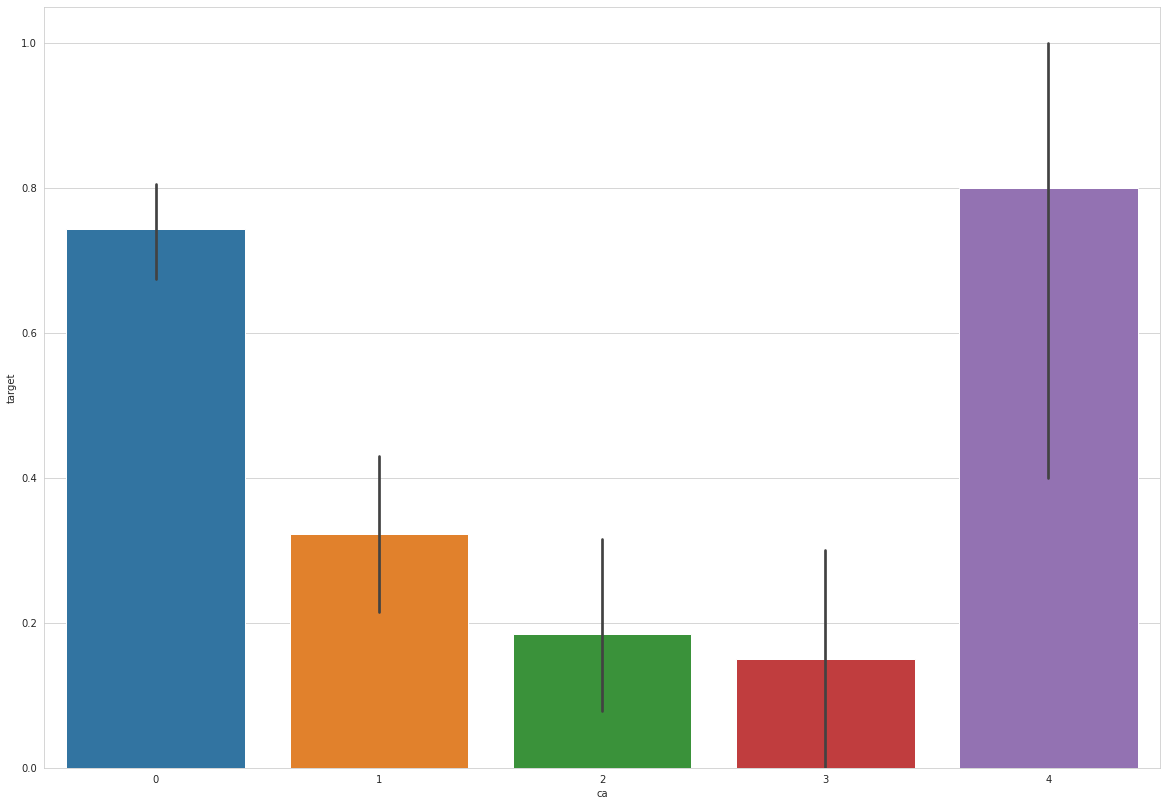

In [18]:
#Analysing the 'ca' feature
sns.barplot(df["ca"],y)

In [36]:
# Machine Learning
from sklearn.model_selection import train_test_split
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [34]:
#Model Fitting
# KNN Classifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
 
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
    Y_pred_knn = knn_classifier.predict(X_test)


     

Text(0.5, 1.0, 'K Neighbors Classifier scores')

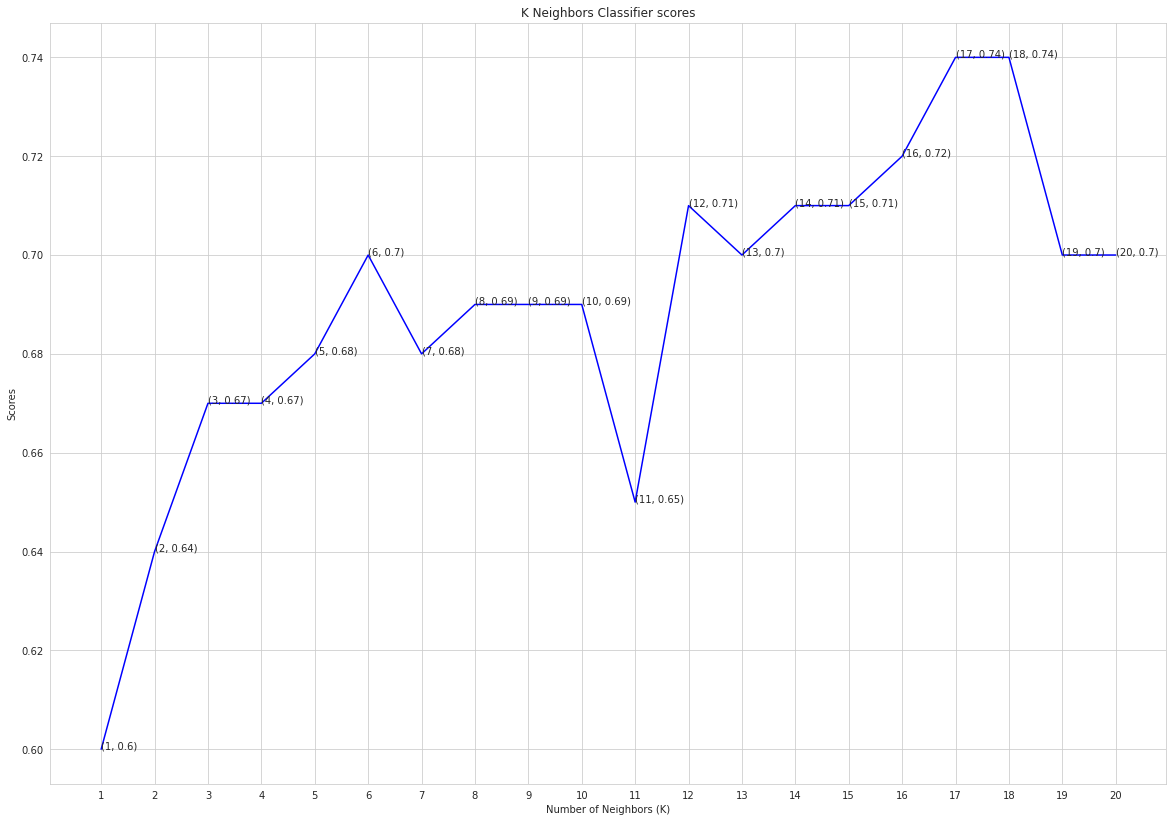

In [41]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores')

In [37]:
# KNN accuracy in %
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.0 %


In [43]:
#Dicision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
    Y_pred_dt = dt_classifier.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Classifier scores ')

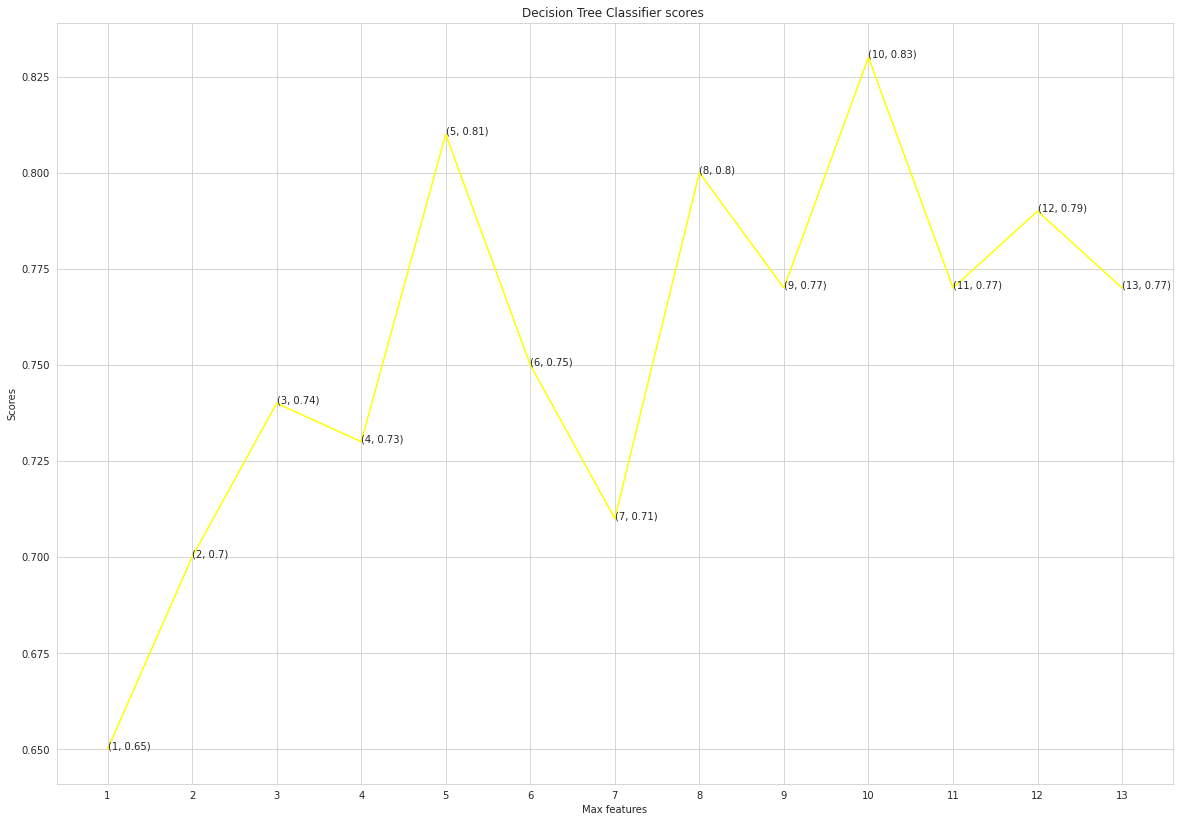

In [50]:


plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'yellow')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores ')



In [44]:
#Decision Tree accuracy in %

score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy % achieved using Decision Tree is: "+str(score_dt)+" %")



The accuracy score achieved using Decision Tree is: 77.0 %


In [47]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [48]:
#Logistic Regression accuracy in %
#The accuracy score achieved using Logistic Regression is: 85.25 %
from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy % achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy % achieved using Logistic Regression is: 83.0 %


In [49]:
# Conclusiom := The accuracy % of Logistic Regression is highest among other Models
